
This code is designed to demonstrate how different weight initialization methods affect the distribution of activations in a neural network. The toy network has four layers, all using the Tanh activation function. The script is divided into two main parts: first, it initializes the network with random weights and visualizes the activations; second, it re-initializes the network with Xavier initialization and visualizes the activations again.


### Random Weight Initialization and Visualization
- The model is instantiated with specific input and hidden layer dimensions.
- Weights are initialized randomly using a normal distribution with mean 0 and standard deviation 0.1.
- Random input data is generated (500 samples, each with 100 features) from a standard normal distribution.
- This data is passed through the network, and the activations at each layer are recorded.
- These activations are plotted as histograms to visualize their distribution.

### Xavier Weight Initialization and Visualization
- The script then re-initializes the weights of the same model using Xavier normalization, which is designed to maintain the variance of activations and gradients, especially for networks with Tanh activations.
- The same input data is passed through the re-initialized network.
- Activations are again recorded and plotted as histograms to show how Xavier initialization affects the distribution.

### Purpose and Observations
- The script aims to illustrate the impact of weight initialization on the behavior of activations in a neural network.
- With random initialization, activations tend to saturate in deeper layers, leading to potential vanishing gradients.
- Xavier initialization helps maintain a balanced distribution of activations, potentially leading to more effective learning.


The plots illustrate the activations' histograms for each layer. As the data flows through the network, the activations in the initial layers have a broader distribution around zero, but by the fourth layer, the distribution becomes increasingly narrow, with most values accumulating at the tails of the Tanh function's output range (near -1 and 1). This pattern suggests that the chosen initialization and activation function may be leading to saturation in the deeper layers of the network, which could impede effective learning during training by reducing the gradient signal—a phenomenon often referred to as the vanishing gradients problem. The visualized data serves as an empirical basis for assessing the model's initial state before training, highlighting the need for careful consideration of weight initialization and activation functions in deep learning models.

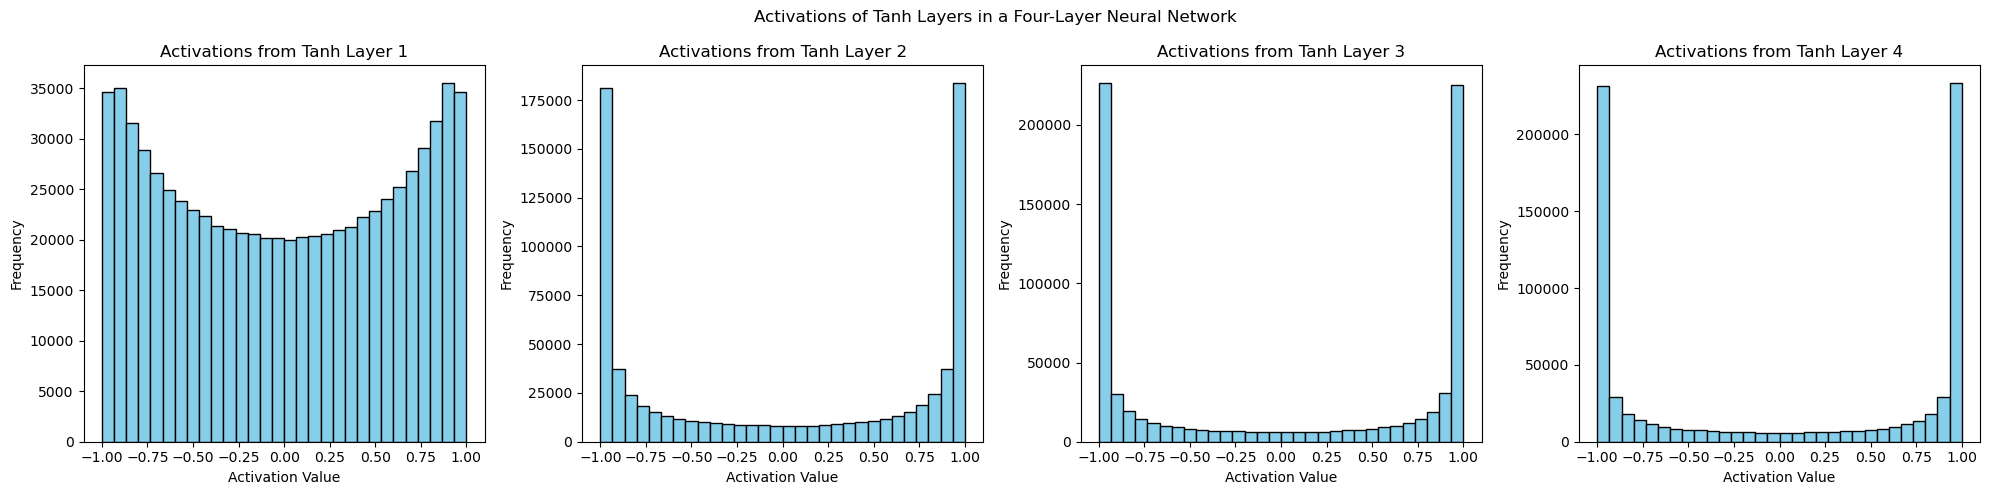

In [ ]:

# Import necessary modules
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.nn.init import kaiming_normal_


# Define the neural network model with four Tanh layers
class FourLayerTanhModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(FourLayerTanhModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, hidden_dim)
        self.layer4 = nn.Linear(hidden_dim, hidden_dim)

    def forward(self, x):
        activations = []
        x = nn.Tanh()(self.layer1(x))
        activations.append(x.detach().numpy())
        x = nn.Tanh()(self.layer2(x))
        activations.append(x.detach().numpy())
        x = nn.Tanh()(self.layer3(x))
        activations.append(x.detach().numpy())
        x = nn.Tanh()(self.layer4(x))
        activations.append(x.detach().numpy())
        return activations

# Initialize the model
input_dim = 100
hidden_dim = 1500
model = FourLayerTanhModel(input_dim, hidden_dim)

# Initialize weights from a normal distribution with mean 0 and variance 0.5
for param in model.parameters():
    nn.init.normal_(param, mean=0, std=0.1)

# Generate some random input data. 500 samples, each with 100 features. The data is drawn from a standard normal distribution with mean 0 and variance 1.
input_data = torch.randn(500, input_dim)

# Forward pass through the model and get the activations
activations = model(input_data)

# Plot the activations
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, activation in enumerate(activations):
    axs[i].hist(activation.flatten(), bins=30, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Activations from Tanh Layer {i+1}')
    axs[i].set_xlabel('Activation Value')
    axs[i].set_ylabel('Frequency')

plt.suptitle('Activations of Tanh Layers in a Four-Layer Neural Network')
plt.tight_layout()
plt.savefig("Activations_RandomInitialization.png")
plt.show()




Now, we alter the `FourLayerTanhModel` class's initialization approach by applying Xavier (also known as Glorot) normalization to the weights. This method is specifically designed to maintain the variance of activations and gradients at an optimal level during the initial phases of training, particularly for networks using the Tanh activation function.

The histograms in the image reveal the distribution of activations across four layers after applying Xavier initialization. The Xavier initialization maintains a more balanced and centered distribution of activations within each layer, compared to the initial random initialization. This centralization helps prevent the saturation of Tanh units, which could lead to the vanishing gradient problem observed in the previous image. By promoting activations that are neither too small nor too large, Xavier initialization aims to ensure a stronger gradient signal, contributing to more effective learning during backpropagation across all layers of the network. This experiment's visualization underscores the significance of proper weight initialization in deep learning models, as it can greatly influence the success of training.

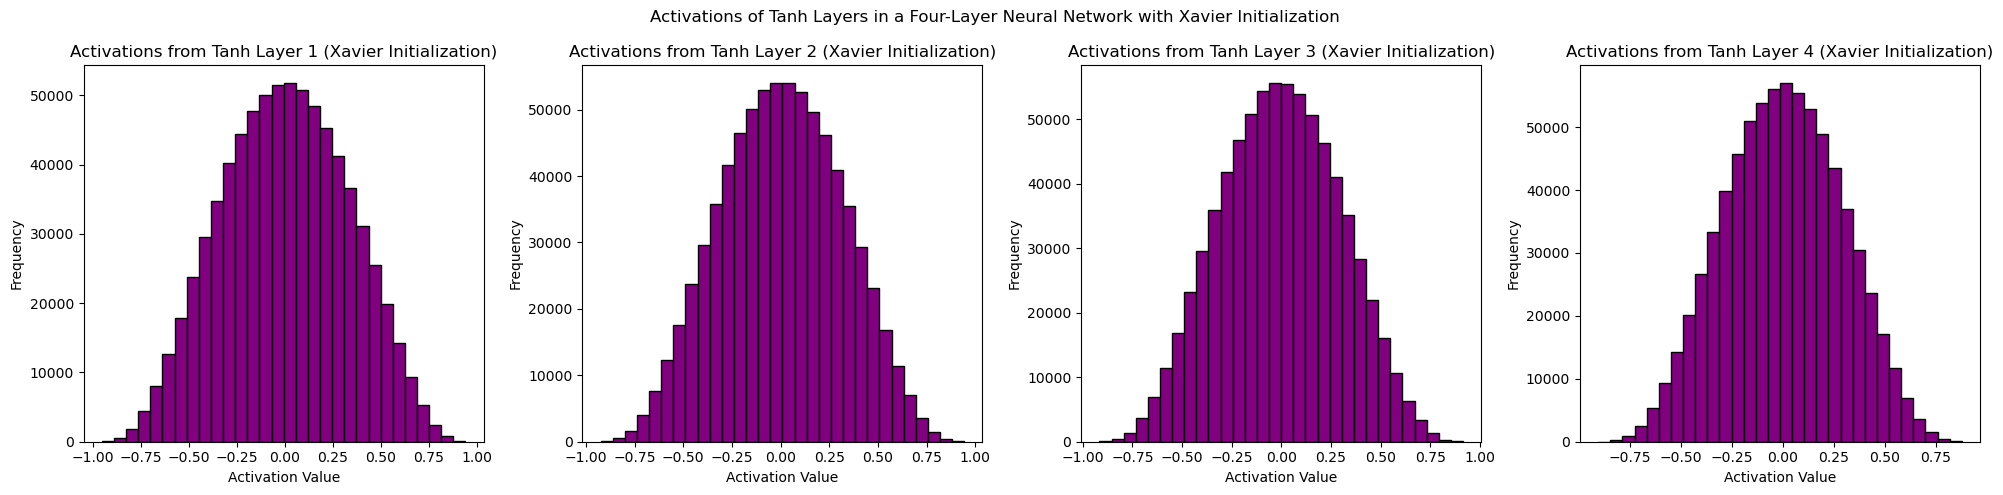

In [ ]:

# Import the necessary initialization function for Kaiming (He) initialization
from torch.nn.init import xavier_normal_

# Re-define and re-initialize the model with Kaiming (He) initialization
for name, param in model.named_parameters():
      if 'weight' in name:
        xavier_normal_(param)

# Forward pass through the model to get the activations with Xavier initialization
kaiming_activations = model(input_data)

# Plot the activations with Xavier initialization
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, activation in enumerate(kaiming_activations):
    axs[i].hist(activation.flatten(), bins=30, color='purple', edgecolor='black')
    axs[i].set_title(f'Activations from Tanh Layer {i+1} (Xavier Initialization)')
    axs[i].set_xlabel('Activation Value')
    axs[i].set_ylabel('Frequency')

plt.suptitle('Activations of Tanh Layers in a Four-Layer Neural Network with Xavier Initialization')
plt.tight_layout()
plt.savefig("Activations_XavierInitialization.png")
plt.show()